In [1]:
# Sonia Garfinkel
# Collisions Midterm Assignment
# Feb 12, 2024

In [2]:
# This is what my role is for the group:
# Sonia: Will map out the traffic collisions for 2020 overall and provide information Traffic Collision MO codes. 
# These MO Codes show the specific type of collision, like vehicle vs. parked vehicle, non injury, and hit and run. 
# Maybe map the patterns of types of traffic collisions onto two different geographies within LA City, like Westwood and East Hollywood.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
from sodapy import Socrata
import requests

In [2]:
# Import 2010 Traffic Collisions Data (CSV)
gdf = gpd.read_file('2020_Collisions.csv')

In [3]:
gdf.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Latitude,Longitude,geometry
0,200113538,6/17/2020,6/14/2020,2030,01,Central,0195,997,TRAFFIC COLLISION,0605 3101 3401 3701 3006 3030 1501,31,F,H,101,STREET,15TH,MAPLE,34.0326,-118.2589,None
1,200518005,12/19/2020,12/19/2020,2205,05,Harbor,0514,997,TRAFFIC COLLISION,3036 3004 3026 3029 3101,39,F,H,101,STREET,LOMITA,FIGUEROA,33.7982,-118.283,None
2,200510368,6/8/2020,6/8/2020,2030,05,Harbor,0525,997,TRAFFIC COLLISION,0605 3037 3004 3028 3101,64,M,B,101,STREET,E,AVALON,33.7739,-118.2678,None
3,200619517,12/20/2020,12/20/2020,2350,06,Hollywood,0648,997,TRAFFIC COLLISION,3003 3025 3035 3037 3102 3401 3701 4006,49,M,H,101,STREET,SUNSET BL,N WESTERN AV,34.0981,-118.3092,None
4,200510482,6/10/2020,6/10/2020,2322,05,Harbor,0526,997,TRAFFIC COLLISION,3037 3004 3028 3030 3101,27,M,H,101,STREET,I,FIGUEROA,33.7798,-118.2656,None


In [4]:
gdf.tail()
# This data set has 42,381 cases!

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Latitude,Longitude,geometry
42377,200310415,4/24/2020,4/24/2020,0240,03,Southwest,0355,997,TRAFFIC COLLISION,3037 4003 3028 3011,19,X,X,101,STREET,3600 S WESTERN AV,,34.0219,-118.3133,None
42378,202109308,5/14/2020,5/14/2020,0110,21,Topanga,2185,997,TRAFFIC COLLISION,3006 3037 3030 3028 3039 3101 4026,52,F,W,101,STREET,SAN MIGUEL ST,NINFA CT,34.1586,-118.6112,None
42379,232011768,6/20/2023,6/15/2020,1400,20,Olympic,2055,997,TRAFFIC COLLISION,3004 3026 3029 3033 3035 3036 4027,43,M,A,101,STREET,KENMORE AV,OLYMPIC BL,34.0527,-118.2968,None
42380,220805929,2/17/2022,2/24/2020,0710,08,West LA,0898,997,TRAFFIC COLLISION,3003 3029 4027 3025 3035 3037 3104 3401 3701,61,M,W,101,STREET,CANFIELD AV,GIBSON ST,34.0381,-118.3917,None
42381,201406555,2/13/2020,2/13/2020,0115,14,Pacific,1473,997,TRAFFIC COLLISION,3003 3029 3037 3101 3401 3701 4027 1402 3034 3027,49,F,W,101,STREET,PERSHING DR,CAMPDELL ST,33.9574,-118.4431,None


In [5]:
gdf['lat']=gdf['Latitude'].str.extract(r'\((.*),.*\)')
gdf['long']=gdf['Longitude'].str.extract(r'\(.*,(.*)\)')
gdf.head()
#Fixing the naming from Latitude to lat and Longitude to long, but instead it just added a lat and long column
# Not sure what this is or if im going to keep it

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Latitude,Longitude,geometry,lat,long
0,200113538,6/17/2020,6/14/2020,2030,01,Central,0195,997,TRAFFIC COLLISION,0605 3101 3401 3701 3006 3030 1501,...,H,101,STREET,15TH,MAPLE,34.0326,-118.2589,None,NaN,NaN
1,200518005,12/19/2020,12/19/2020,2205,05,Harbor,0514,997,TRAFFIC COLLISION,3036 3004 3026 3029 3101,...,H,101,STREET,LOMITA,FIGUEROA,33.7982,-118.283,None,NaN,NaN
2,200510368,6/8/2020,6/8/2020,2030,05,Harbor,0525,997,TRAFFIC COLLISION,0605 3037 3004 3028 3101,...,B,101,STREET,E,AVALON,33.7739,-118.2678,None,NaN,NaN
3,200619517,12/20/2020,12/20/2020,2350,06,Hollywood,0648,997,TRAFFIC COLLISION,3003 3025 3035 3037 3102 3401 3701 4006,...,H,101,STREET,SUNSET BL,N WESTERN AV,34.0981,-118.3092,None,NaN,NaN
4,200510482,6/10/2020,6/10/2020,2322,05,Harbor,0526,997,TRAFFIC COLLISION,3037 3004 3028 3030 3101,...,H,101,STREET,I,FIGUEROA,33.7798,-118.2656,None,NaN,NaN


In [7]:
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [8]:
gdf.value_counts()
# Nothing showed up here
# Lets see if we can graph anything

Series([], Name: count, dtype: int64)

In [10]:
#Getting the specific columns that I am curious about at the moment
desired_columns=['Date Reported', 'MO Codes', 'Victim Descent', 'Latitude', 'Longitude'  ]

In [12]:
gdf[desired_columns].sample(5)

,Date Reported,MO Codes,Victim Descent,Latitude,Longitude
32678,9/15/2020,3004 3036 3602 3026 3101 4026,W,34.1976,-118.4574
38970,10/22/2020,4025 3036 3101 3601 3009 3027,H,33.7958,-118.2975
30339,8/6/2020,4012 3037 3004 3028 3030 3101,H,33.9924,-118.2827
24197,6/1/2020,0605 3101 3401 3701 3004 3029 3026,W,34.0775,-118.2654
41838,12/6/2020,3004 3028 3030 3037 3101 4021,H,34.2201,-118.5798


In [14]:
gdf_trimmed = gdf[desired_columns].copy() 
gdf_trimmed
#.copy creates a copy. you can also do a copy by re running
# the python cells
#create a permanent variable where we trim the data and make a 
#copy of it

,Date Reported,MO Codes,Victim Descent,Latitude,Longitude
0,6/17/2020,0605 3101 3401 3701 3006 3030 1501,H,34.0326,-118.2589
1,12/19/2020,3036 3004 3026 3029 3101,H,33.7982,-118.283
2,6/8/2020,0605 3037 3004 3028 3101,B,33.7739,-118.2678
3,12/20/2020,3003 3025 3035 3037 3102 3401 3701 4006,H,34.0981,-118.3092
4,6/10/2020,3037 3004 3028 3030 3101,H,33.7798,-118.2656
...,...,...,...,...,...
42377,4/24/2020,3037 4003 3028 3011,X,34.0219,-118.3133
42378,5/14/2020,3006 3037 3030 3028 3039 3101 4026,W,34.1586,-118.6112
42379,6/20/2023,3004 3026 3029 3033 3035 3036 4027,A,34.0527,-118.2968
42380,2/17/2022,3003 3029 4027 3025 3035 3037 3104 3401 3701,W,34.0381,-118.3917


In [17]:
# Getting a count for MO Codes in the data. 
# Shows blank MO code for 1973 counts
# Shows 0605 for 610 counts
# Shows 0605 3101 3401 3701 3006 3030 for 577 counts
# Shows 3004 3028 3030 3035 3037 3101 3401 3701 4027 for 530 counts
# Shows 3006 3028 3030 3035 3037 3101 3401 3701 4027 for 517 counts
gdf_trimmed['MO Codes'].value_counts()
# I don't know how many counts are not being shown here because of the three dots.
# I'm going to pull up the MO codes and see what they mean

MO Codes
                                                     1973
0605                                                  610
0605 3101 3401 3701 3006 3030                         577
3004 3028 3030 3035 3037 3101 3401 3701 4027          530
3006 3028 3030 3035 3037 3101 3401 3701 4027          517
                                                     ... 
3006 3037 3602 3038 3026 3032 3101 4026                 1
3003 3027 3032 3037 3102 4026                           1
3006 3028 3030 3035 3037 3401 3701 4020 3101            1
3006 4020 3028 3030 3035 3037 3101 3401 3701            1
3003 3029 3037 3101 3401 3701 4027 1402 3034 3027       1
Name: count, Length: 12282, dtype: int64

In [22]:
gdf_trimmed.sample(25)

,Date Reported,MO Codes,Victim Descent,Latitude,Longitude
28095,7/27/2020,,O,34.0497,-118.437
12957,2/28/2020,3006 3028 3030 3035 3037 3101 3401 3701 4027,H,34.088,-118.3222
31960,7/16/2020,,W,33.9884,-118.2915
13279,3/2/2020,3006 3028 3030 3035 3037 3101 3401 3701 4014,H,33.9573,-118.3962
11335,2/24/2020,3101 3401 3701 0605 3030 3004 3036,W,34.0888,-118.2881
3225,8/2/2020,3006 3037 3025 3101 4016,H,34.2797,-118.418
41703,12/14/2020,0605 3102 3401 3701 3002 3006 3032 3034,H,34.0374,-118.2636
38389,10/12/2020,4010 3004 3036 3026 3101,B,34.1839,-118.5447
13261,7/16/2020,0605 3101 3401 3701 3006 3030 3102,O,34.0437,-118.2003
4474,8/21/2020,4025 3036 3004 3026 3101,H,33.9455,-118.3177


In [ ]:
# This is the most common set of MO Codes for a traffic collision, and their meanings:
# Source: https://data.lacity.org/api/views/d5tf-ez2w/files/8957b3b1-771a-4686-8f19-281d23a11f1b?download=true&filename=MO_CODES_Numerical_20180627.pdf

# MO Codes Below: 
# Shows 0605 for 610 counts
# Shows 0605 3101 3401 3701 3006 3030 for 577 counts
# Shows 3004 3028 3030 3035 3037 3101 3401 3701 4027 for 530 counts
# Shows 3006 3028 3030 3035 3037 3101 3401 3701 4027 for 517 counts

# 0605 = Traffic Accident/Traffic related incident (Yes, we know this. This is Traffic Collisions Data)
# However, there are 42,000 rows in this dataset, so why is this only showing Collision codes for a small fraction of them? 
# maybe its because each type of accident is uniquie in some way. Doesnt seem like the best way to show off the data though. 

# 0605 3101 3401 3701 3006 3030 = Highest Numbers together
# Meaning, the most common traffic insadents are vehicles hitting parked vehicles, running from the scene, and getting a misdemeanor 
# 3101: PCF (Primary Collsiion Factor) (A) In the Narrative >> This might mean that the Primary Collision person was interviewed by the police
# 3401: Type of Collision
# 3701: Movement Preceding Collision
# 3006: Veh vs Parked Veh
# 3030: Hit and Run Misd

#3004 3028 3030 3035 3037 3101 3401 3701 4027 = Second Highest Numbers Together
# Meaning: A non injury, vehicle crashing into vehicle, hit and run, not at an intersection, not involving city property, primary vehicle interviewed
# the car that crashed into the other car was driving already, and the data was collected by LAPD from the Westside  
# 3004: Veh vs Veh 
# 3028: (N) Non Injury
# 3030: Hit and Run Misd
# 3035: City Property Involved - No
# 3037: At Intersection - No
# 3101: PCF (A) In the Narrative
# 3401: Type of Collision
# 3701: Movement Preceding Collision
# 4027: West Traffic (WTD)


#I need a way to parse out the indivuidal MO Codes to see which one of these were serious or fatal and which one of them were not. 
#Right now, this is just showing the full chain of events for each crash, which is cool, but not what i'm looking for. 

# I want to be able to map out fatal injury v non injury
# Fatal Injury: 3027

In [18]:
import folium

In [19]:
# Getting a count for Victim Descent in the data. 
gdf_trimmed['Victim Descent'].value_counts()
# Shows 17238 Hispanic Latino; 7823 White, 6227 Black, 4796 O

Victim Descent
H    17238
W     7823
B     6227
O     4796
X     3542
A     1210
       963
K      249
F      133
C       72
J       28
V       25
I       21
U       18
Z       15
P       12
G        5
S        2
L        2
D        1
Name: count, dtype: int64

In [24]:
MO_Count = gdf_trimmed['MO Codes'].value_counts()

<Axes: xlabel='MO Codes'>

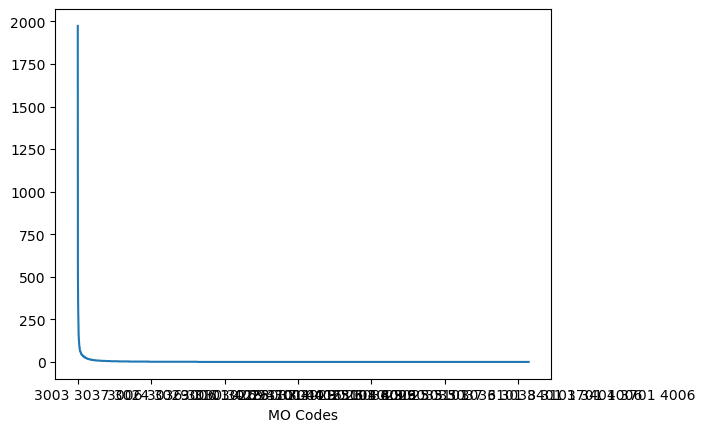

In [25]:
MO_Count.plot()
# This is not good, but the MO Codes is where I want to focus my reserach on,
# So I need to figure out how to take out these MO Codes

In [28]:
Date_Reported = gdf_trimmed['Date Reported'].value_counts()
Date_Reported

Date Reported
2/3/2020     207
2/7/2020     183
3/2/2020     182
2/21/2020    180
1/23/2020    179
            ... 
2/5/2021       1
4/13/2021      1
2/7/2021       1
2/3/2021       1
2/17/2022      1
Name: count, Length: 453, dtype: int64

<Axes: title={'center': 'Traffic Collisions by Date Reported'}, xlabel='Date Reported'>

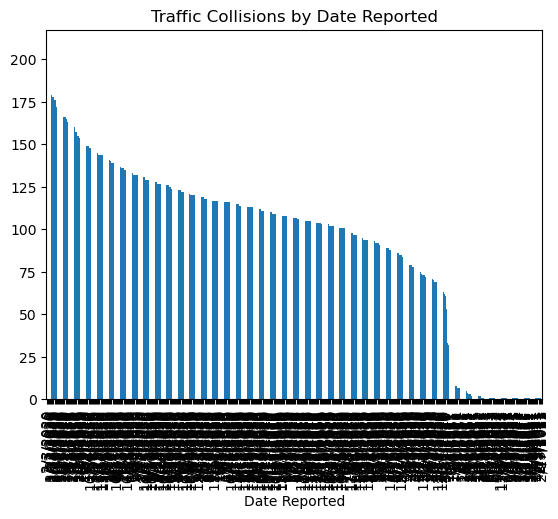

In [29]:
# Let's get a bar graph for when the date was reported
# gives it additional arguments
Date_Reported.plot.bar(x = 'Date Reported', y = 'count', title = 'Traffic Collisions by Date Reported')

In [ ]:
# I want to put these more into buckets.